In [1]:
import numpy as np
import pandas as pd

# 1. Load the dataset into python environment

In [2]:
df=pd.read_csv('titanic_dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Make ‘PassengerId’ as the index column

In [3]:
df = df.set_index('PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. Check the basic details of the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.shape

(891, 11)

In [7]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# 4. Fill in all the missing values present in all the columns in the dataset

In [8]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:

df['Cabin'].mode()

0        B96 B98
1    C23 C25 C27
2             G6
dtype: object

In [10]:
df['Embarked'].mode()

0    S
dtype: object

In [11]:
df['Cabin']=df['Cabin'].fillna(df['Cabin'].ffill())
df['Age']=df['Age'].fillna(df['Age'].median())  
df['Embarked']=df['Embarked'].fillna('S')

In [12]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       1
Embarked    0
dtype: int64

# 5. Check and handle outliers in at least 3 columns in the dataset

## Outlier of Fare

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

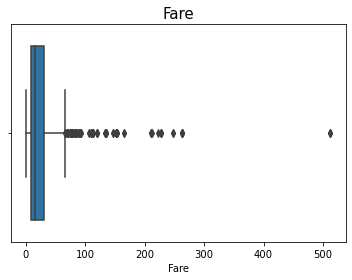

In [15]:
plt.figure()
sns.boxplot(x=df['Fare'])
plt.title("Fare", fontsize=15)
plt.show()

## Removing the outliers

In [16]:
q1=np.percentile(df['Fare'],25)
q2=np.percentile(df['Fare'],50)
q3=np.percentile(df['Fare'],75)

iqr=q3-q1

low_lim= q1- 1.5*iqr
up_lim= q3 + 1.5*iqr



In [17]:
print(low_lim)

-26.724


In [18]:
print(up_lim)

65.6344


In [19]:
outlier=[]
for x in df['Fare']:
    if(x>up_lim) or (x<low_lim):
        outlier.append(x)
        
print(outlier) 

[71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 146.5208, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 153.4625, 135.6333, 77.9583, 78.85, 91.0792, 151.55, 247.5208, 151.55, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 75.25, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 263.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 79.2, 78.2667, 153.4625, 77.9583, 69.3, 76.7292, 73.5, 113.275, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 71.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 80.0, 83.1583, 69.55, 89.1042, 164.8667, 69.55, 83.1583]


In [20]:
index1=df.loc[df['Fare']>up_lim].index

df.drop(index1,inplace=True)

In [21]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C85,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C123,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,C123,Q
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,C50,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,B42,S


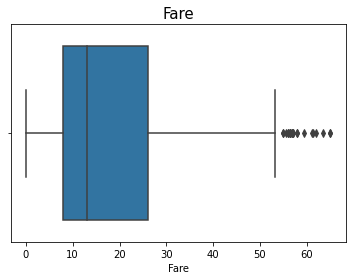

In [22]:
plt.figure()
sns.boxplot(x=df['Fare'])
plt.title("Fare", fontsize=15)
plt.show()

## Outlier of Parch


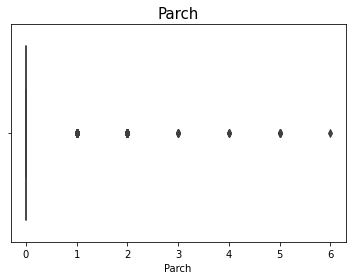

In [24]:
plt.figure()
sns.boxplot(x=df['Parch'])
plt.title("Parch", fontsize=15)
plt.show()

## Removing the outliers

In [25]:
q1=np.percentile(df['Parch'],25)
q2=np.percentile(df['Parch'],50)
q3=np.percentile(df['Parch'],75)

iqr=q3-q1

low_lim= q1- 1.5*iqr
up_lim= q3 + 1.5*iqr

In [26]:
outlier=[]
for x in df['Parch']:
    if(x>up_lim) or (x<low_lim):
        outlier.append(x)
        
print(outlier)

[1, 2, 1, 5, 1, 1, 5, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 3, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 4, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 3, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 4, 1, 2, 1, 1, 2, 5, 2, 1, 1, 1, 2, 1, 5, 2, 1, 1, 1, 1, 6, 2, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 3, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 3, 1, 1, 1, 5, 2]


In [27]:
index1=df.loc[df['Parch']>up_lim].index

df.drop(index1,inplace=True)

In [28]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C85,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C123,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,C123,Q
...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,C50,S
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,C50,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


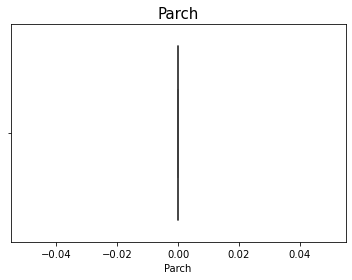

In [29]:
plt.figure()
sns.boxplot(x=df['Parch'])
plt.title("Parch", fontsize=15)
plt.show()

# Outlier of Age

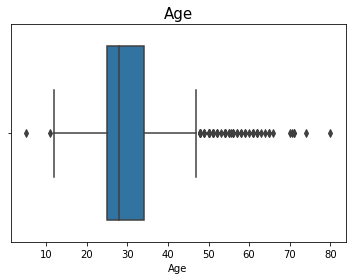

In [31]:
plt.figure()
sns.boxplot(x=df['Age'])
plt.title("Age", fontsize=15)
plt.show()

## Removing the outliers

In [32]:
q1=np.percentile(df['Age'],25)
q2=np.percentile(df['Age'],50)
q3=np.percentile(df['Age'],75)

iqr=q3-q1

low_lim= q1- 1.5*iqr
up_lim= q3 + 1.5*iqr

In [33]:
outlier=[]
for x in df['Age']:
    if(x>up_lim) or (x<low_lim):
        outlier.append(x)
        
print(outlier)

[54.0, 58.0, 55.0, 66.0, 59.0, 71.0, 70.5, 51.0, 55.5, 61.0, 56.0, 50.0, 51.0, 59.0, 54.0, 62.0, 65.0, 54.0, 61.0, 51.0, 50.0, 52.0, 65.0, 50.0, 48.0, 48.0, 56.0, 50.0, 63.0, 58.0, 55.0, 71.0, 54.0, 50.0, 64.0, 62.0, 48.0, 62.0, 53.0, 54.0, 49.0, 49.0, 61.0, 57.0, 80.0, 51.0, 56.0, 70.0, 60.0, 52.0, 48.0, 52.0, 50.0, 11.0, 48.0, 57.0, 5.0, 49.0, 74.0, 51.0, 48.0]


In [34]:
index1=df.loc[df['Age']>up_lim].index

df.drop(index1,inplace=True)

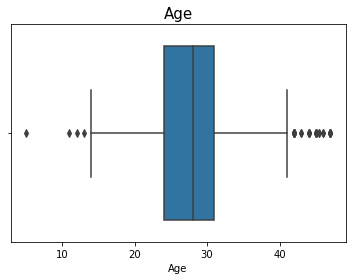

In [35]:
plt.figure()
sns.boxplot(x=df['Age'])
plt.title("Age", fontsize=15)
plt.show()

In [36]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C85,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C123,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,C123,Q
...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,C50,S
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,C50,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


#   6. Do min max scaling on the feature set (Take ‘Survived’ as target)

## Regression On the dataset taking Survived as dependent variable and Pclass,Age,SibSp,Parch and Fare as independent variable without doing min max scaling of the variables

In [37]:
y=df['Survived']

In [38]:
X=df.drop(['Survived','Name','Sex','Ticket','Cabin','Embarked'],axis=1)

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=.25)

In [40]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(X_train,y_train)
pred=model.predict(X_test)


In [41]:
from sklearn.metrics import mean_squared_error
print("MSE is",mean_squared_error(y_test,pred))

MSE is 0.1923130800621249


In [42]:
lr.intercept_

0.4119361122826124

In [43]:
lr.coef_

array([-0.05622139, -0.00334674,  0.04438499,  0.        ,  0.00879732])

In [44]:
from sklearn.metrics import r2_score
print("R^2 value is", r2_score(pred,y_test))

R^2 value is -9.419737394006278


The regression equation before scaling is


Survived= 0.4119361122826124 +  -0.05622139*Pclass + -0.00334674*Age + 0.04438499*SibSp + 0.00879732*Fare  
        
      MSE=  0.19231308006212489
    
      R^2=   -9.419737394006274

## Minmax scaling on independent variables

In [46]:
from sklearn.preprocessing import  MinMaxScaler


In [47]:
scaler = MinMaxScaler()
d=scaler.fit_transform(X)

In [48]:
X=pd.DataFrame(d)

In [49]:
X.describe()

,0,1,2,3,4
count,550.000000,550.000000,550.000000,550.0,550.000000
mean,0.770909,0.552035,0.068485,0.0,0.235605
std,0.354864,0.170366,0.156995,0.0,0.196831
min,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.500000,0.452381,0.000000,0.0,0.127094
50%,1.000000,0.547619,0.000000,0.0,0.139865
75%,1.000000,0.619048,0.000000,0.0,0.253371
max,1.000000,1.000000,1.000000,0.0,1.000000


## Linear regression model after scaling

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=.25)

In [52]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(X_train,y_train)
pred=model.predict(X_test)

In [53]:
from sklearn.metrics import mean_squared_error
print("MSE is",mean_squared_error(y_test,pred))

MSE is 0.19231308006212489


In [54]:
lr.intercept_

0.33898104436347803

In [55]:
lr.coef_

array([-0.11244278, -0.14056289,  0.13315496,  0.        ,  0.53817585])

In [56]:
from sklearn.metrics import r2_score
print("R^2 value is", r2_score(pred,y_test))

R^2 value is -9.419737394006274


Conclusion: There is no change in the regression model after minmax scaling
       
The regression equation is
            
     Survived= 0.33898104436347803 +  -0.11244278*Pclass+-0.14056289*Age+0.13315496*SibSp+ 0.53817585*Fare  
        
      MSE=  0.19231308006212489
    
      R^2=   -9.419737394006274

In [57]:
#Scaling Survived

In [58]:
l=df[['Survived']]

In [59]:
t=scaler.fit_transform(l)
l=pd.DataFrame(t)
l.describe()

,0
count,550.000000
mean,0.296364
std,0.457069
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000
